<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Forecasting of deaths from Heart Failure on medical measurement

# Lab 5. Model Evaluation and Refinement

Estimated time needed: **30** minutes

## Abstract

This lab is dedicated to the study of machine learning classification methods. The goal is to determine the impact of different measurements on mortality rate of patients with heart failure.

## Introduction

The main problem to be solved in this lab is the classification of patients who died of heart failure.

The peculiarities of classification analysis are that you must first correctly prepare a data set. In addition, today there are many different methods of classification. Each of them has its own characteristics and opportunities for analysis. An various classifiers are demonstrated in this lab, as well as join them with into ensemble. It is also demonstrated how all stages of training preparation and analysis can be combined with Pipeline.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li>Materials and methods
            <ul>
                <li>Prerequisites</li>
            </ul>
        </li>
        <li>Import Libraries</li>
        <li>Load the Dataset</li>
        <li>Data pre-preparation</li>
        <li>Pipiline Classification
             <ul>
                <li>RandomForestClassifier</li>
                 <li>Cross-validation</li>
                 <li>Accuracy</li>
            </ul>
        </li>
         <li>Over-sampling proble</li>
        <li>Ensemble of classifiers
            <ul>
                <li>Question 1</li>
            </ul>
        </li>
        <li>Conclusions</li>
        <li>Authors</li>
    </ol>
</div>

## Materials and methods

In this lab, we will learn how to download and pre-prepare data, classify and combine classifiers into an ensemble.
This lab consists of the following steps:
* Download data - download and display data from a file
* Preliminary data preparation - preliminary analysis of data structure, change of data structure and tables
* Pipeline classification - classification and analysis by grouping stages
    * Logistic regression - classification and analysis of accuracy and errors using logistic regression
    * Over-sampling problem - solve the problem of uneven distribution of data
    * Ensemble of classifiers - study various classifiers and methods of combining them into an ensemble

The statistical data was obtained from the https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital. This DataSet released under CC0: Public Domain license that allow of copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. 

## Prerequisites
* [Python](https://www.python.org) - middle level
* [Pandas](https://pandas.pydata.org) - middle level 
* [Matplotlib](https://matplotlib.org) - basic level
* [SeaBorn](https://seaborn.pydata.org) - basic level
* [Scikit-Learn](https://scikit-learn.org/stable/) - middle level 

## Objectives

After completing this lab, you will be able to:

* Download DataSet from * .csv files
* Conduct basic data analysis
* Calculate new and change column types
* Divide the DataSet into training and test
* Use different machine learning classification methods
* Combine classifiers into ensemble
* Calculate accuracy and analyze errors
* Combine all stages of data analysis with Pipeline

## Import Libraries/Define Auxiliary Functions

Libraries such as Pandas, MatplotLib, SeaBorn, Scikit-Learn, imbalanced-learn should be installed.

In [1]:
# conda install -c conda-forge pandas

In [2]:
# conda install -c conda-forge matplotlib

In [3]:
# conda install -c conda-forge seaborn 

In [4]:
# conda install -c intel scikit-learn

In [5]:
conda install -c conda-forge imbalanced-learn

## Download data from a .csv file

Some libraries should be imported before you can begin.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler                         
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Let's disable warnings by **[warnings.filterwarnings()](https://docs.python.org/3/library/warnings.html)**

In [7]:
import warnings
warnings.filterwarnings('ignore')

Further specify the value of the precision parameter equal to 2 to display two decimal signs (instead of 6 as default) by and  **[pd.options.display](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)**.

In [8]:
pd.options.display.float_format = '{:.2f}'.format

The next step is to download the data file from the repository by **[read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)**.

We will use the same DataSet like in previous lab. Therefore next some steps will be the same.

In [9]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX05QLEN/clean_df_new.csv')

Now let's look at our DataSet.

In [10]:
df

,Age Group,Marital Status,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,Smoking,Diabetes,HTN,...,Vessels num,Thal,Num,Streptokinase,SK React,Mortality,Follow up,Max heart rate-binned,Gender-male,Locality-urban
0,41-50,MARRIED,False,False,FREE,True,True,False,1,False,...,0,7,2,1,NO,0,60,Medium,0,0
1,51-60,MARRIED,False,False,FREE,True,True,False,0,False,...,0,7,2,1,NO,0,15,Medium,0,1
2,51-60,MARRIED,True,True,FREE,True,True,False,1,True,...,0,3,2,1,NO,0,6,Medium,0,0
3,51-60,MARRIED,True,True,FREE,True,True,False,1,True,...,1,7,3,1,NO,0,52,Medium,0,0
4,51-60,MARRIED,True,False,FREE,True,True,False,1,True,...,2,7,3,1,NO,0,34,Medium,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,51-60,MARRIED,False,False,FREE,True,False,False,0,True,...,0,7,3,0,BODY.PAIN,0,60,High,1,1
364,51-60,MARRIED,True,False,FREE,True,True,True,0,False,...,3,7,3,1,STOMACH.BLEEDING,0,36,Medium,1,0
365,51-60,MARRIED,False,False,FREE,True,True,False,1,True,...,3,3,1,1,COUGH.BLEEDING,0,32,Medium,1,1
366,51-60,MARRIED,False,False,FREE,True,True,True,0,True,...,0,7,4,1,COUGH.BLEEDING,0,32,Medium,1,1


## Data investigation

Let's study DataSet. As you can see DataSet consist 368 rows × 47 columns. As you can see DataSet consist information of different types. We should be sure that python recognized data types in right way. To do this we shoul use **[pandas.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)**.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age Group                     368 non-null    object 
 1   Marital Status                368 non-null    object 
 2   Lifestyle                     368 non-null    bool   
 3   Sleep                         368 non-null    bool   
 4   Category                      368 non-null    object 
 5   Depression                    368 non-null    bool   
 6   Hyperlipidemia                368 non-null    bool   
 7   Smoking                       368 non-null    bool   
 8   Diabetes                      368 non-null    int64  
 9   HTN                           368 non-null    bool   
 10  Allergies                     368 non-null    bool   
 11  BP                            368 non-null    float64
 12  Thrombolysis                  368 non-null    int64  
 13  BGR  

<details>
<summary><b>Click to see attribute information</b></summary>
    
Input features (column names):

1. `Age Group` - patient age divided by groups (categorical)
2. `Marital Status` - married or single (categorical)
3. `Lifestyle` - does the patient have healthy lifestyle (boolean)
4. `Sleep` - does the patient sleep enough?(boolean)
5. `Category` paid or free treatment (categorical)
6. `Depression` - does patient feel depressed? (boolean)
7. `Hyperlipidemia` - an excess of lipids or fats in your blood (boolean)
8. `Smoking` - does the patient smoke? (boolean)
9. `Diabetes` - does the patient have diabetes? (binary)
10. `HTN` - hypertension, also known as high blood pressure (boolean)
11. `Allergies` - does the patient have allergies? (boolean)
12. `BP` - blood pressure (float, normalized)
13. `Thrombolysis` - uses medications or a minimally invasive procedure to break up blood clots and prevent new clots from forming (binary)
14. `BGR` - blood glucose level (int)
15. `CPK` - creatine phosphokinase level (int)
16. `ESR` - erythrocyte sedimentation rate (int)
17. `WBC` - white blood cells, also known as leukocytes (int)
18. `RBC` - red blood cells, also known as erythrocytes (float)
19. `Hemoglobin` - hemoglobin level (float)
20. `MCH` - mean corpuscular hemoglobin or the average amount in each of red blood cells of a hemoglobin (float)
21. `MCHC` - mean corpuscular hemoglobin concentration (float)
22. `PlateletCount` - count of platelets or thrombocytes (int)
23. `Lymphocyte` - share of lymphocytes in blood (float)
24. `Monocyte` -  share of monocytes in blood (float)
25. `Eosinophil` - count of eosinophils (int)
26. `Others` - other diseases, that weren't mentioned (categorical)
27. `Diagnosis` - what is the patient's diagnosis? (float)
28. `Hypersensitivity` - does the patient have hypersensitivity? (boolean)
29. `Chest pain type` - patient's chest pain stage (int)
30. `Resting BP` - resting blood pressure (float)
31. `Serum cholesterol` - amount of total cholesterol in their blood (float)
32. `FBS` - fasting blood sugar > 120 mg/dl (binary)
33. `Resting electrocardiographic` - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy) (int)
34. `Max heart rate` - patient's maximum heart rate achieved (int)
35. `Angina` - does the patient have exercise induced angina (binary)
36. `ST depression` - ST depression induced by exercise relative to rest (float)
37. `Slope` - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) (int)
38. `Vessels num` - number of major vessels (0-3) colored by flourosopy (int)
39. `Thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect (int)
40. `Num` -  diagnosis of heart disease (angiographic disease status) (int)
41. `Streptokinase` - used to dissolve blood clots that have formed in the blood vessels. Does the patient take it? (binary)
42. `SK React` - what is the reaction from streptokinase (categorical)
43. `Follow up` - number of patient's visiting time (int)
44. `Max heart rate-binned` - patient's maximum heart rate achieved - binned (from Lab2) (categorical)
45. `Gender-male` - is the patient male (from Lab2)? (binary)
46. `Locality-urban` - is the patient's locality urban (from Lab2)? (binary)

Output feature (desired target):

47. `Mortality` - did the patient die of heart failure? (binary)
    
    </details>

## Pipeline Classification

### LogisticRegression

Before classification, the dataset must be divided into input and target factors.

In [12]:
x = df.drop(columns = ['Mortality'])

In [13]:
y = df['Mortality']

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age Group                     368 non-null    object 
 1   Marital Status                368 non-null    object 
 2   Lifestyle                     368 non-null    bool   
 3   Sleep                         368 non-null    bool   
 4   Category                      368 non-null    object 
 5   Depression                    368 non-null    bool   
 6   Hyperlipidemia                368 non-null    bool   
 7   Smoking                       368 non-null    bool   
 8   Diabetes                      368 non-null    int64  
 9   HTN                           368 non-null    bool   
 10  Allergies                     368 non-null    bool   
 11  BP                            368 non-null    float64
 12  Thrombolysis                  368 non-null    int64  
 13  BGR  

You can see the input data set consists from 46 columns.

As you can see, 7 columns are objects, and all others are numerical and boolean. To make classification, all numerical fields must be normalized and categorical fields must be digitized. This can be automated using the **[sklearn.preprocessing.OrdinalEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)** and **[sklearn. preprocessing.StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**.

Since the machine learning process consists of several steps, each of which has the function `fit`,` predict` and etc, we can combine all these stages into one block using `Pipeline` (**[sklearn.pipeline.make_pipeline()](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)**), **[sklearn.compose.make_column_transformer()](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html)** and visualize it with: **[sklearn.set_config()](https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html)**.

In [15]:
col_cat = list(x.select_dtypes(include=['object']).columns)
col_num = list(x.select_dtypes(include=['float', 'int', 'bool']).columns)

In [16]:
trans = make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),col_cat),
                                (StandardScaler(),col_num),
                                remainder = 'passthrough')
set_config(display = 'diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Age Group', 'Marital Status', 'Category',
                                  'Others', 'Diagnosis', 'SK React',
                                  'Max heart rate-binned']),
                                ('standardscaler', StandardScaler(),
                                 ['Lifestyle', 'Sleep', 'Depression',
                                  'Hyperlipidemia', 'Smoking', 'Diabetes',
                                  'HTN', 'Allergies', 'BP', 'Thrombolysis',
                                  'BGR', 'CPK', 'ESR', 'WBC', 'RBC',
                                  'Hemoglobin', 'MCH', 'MCHC', 'PlateletCount',
                                  'Lymphocyte', 'Monocyte', 'Eosinophil',
                                  'Hypersensitivity', 'Chest pain type',
                                  'Resting BP', 'Serum cholesterol', 'FBS',
                                  'Resting electrocardiographic',
                                  'Max heart rate', 'Angina', ...])])

Next we must separate DataSets for train and test DataSets for calculate accuracy of models. To do this we can use **[sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**. Let's separate DataSets in 0.3 proportion train/test

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, shuffle=False)

In [18]:
x_train.shape

(257, 46)

In [19]:
x_test.shape

(111, 46)

Nowe let's create a logistic regression model (**[sklearn.linear_model.LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**) and add it to our `Pipeline`.

In [20]:
lr = LogisticRegression()
pipe_lr = make_pipeline(trans ,lr)

Let's fit our model.

In [21]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Age Group',
                                                   'Marital Status', 'Category',
                                                   'Others', 'Diagnosis',
                                                   'SK React',
                                                   'Max heart rate-binned']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Lifestyle', 'Sleep',
                                                   'Depression',
                                                   'Hyperli...'Smoking',
                                                   'Diabetes', 'HTN',
                                                   'Allergies', 'BP',
                                                   'Thrombolysis', 'BGR', 'CPK',
                                                   'ESR', 'WBC', 'RBC',
                                                   'Hemoglobin', 'MCH', 'MCHC',
                                                   'PlateletCount',
                                                   'Lymphocyte', 'Monocyte',
                                                   'Eosinophil',
                                                   'Hypersensitivity',
                                                   'Chest pain type',
                                                   'Resting BP',
                                                   'Serum cholesterol', 'FBS',
                                                   'Resting '
                                                   'electrocardiographic',
                                                   'Max heart rate', 'Angina', ...])])),
                ('logisticregression', LogisticRegression())])

#### Cross-validation
Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.
The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

In [22]:
Rcross = cross_val_score(pipe_lr, x, y, cv=4)
print(Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

[0.84782609 0.86956522 0.93478261 0.88043478]
The mean of the folds are 0.8831521739130436 and the standard deviation is 0.03203757098519457


Let's use `cros_val_predict` to generate cross-validated estimates for each input data point.

In [23]:
yhat = cross_val_predict(pipe_lr, x, y,cv=4)
yhat[0:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

#### Accuracy
Let's calculate accuracy of this pipeline.

In [24]:
scores_train = pipe_lr.score(x_train, y_train)
scores_test = pipe_lr.score(x_test, y_test)
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))

Training DataSet accuracy:  91.1% Test DataSet accuracy:  91.0%


Let's evaluate the correctness of the classification with: **[sklearn.metrics.plot_confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)** and convince of these conclusions.

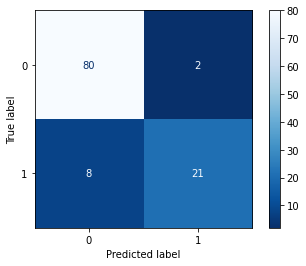

In [25]:
plot_confusion_matrix(pipe_lr, x_test, y_test, cmap=plt.cm.Blues_r)

plt.show() 

As you can see from the table, our model predicts patient's mortality very well. At the same time, errors in the classification of patients are also not too big. The correct forecast is 101 patients. In 8 cases when the patient actually died of heart failure, the model shows that the patient will survive. Conversely, in the 2 cases, our model predicts that the patient will die of heart failure, but in fact he will survive. That is, the error is great for those patient who really has a risk to die.

The `Recall` metric is used to assess the accuracy of only purchased goods: **[sklearn.metrics.recall_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)**

In [26]:
scores_train = recall_score(y_train, pipe_lr.predict(x_train))
scores_test = recall_score(y_test, pipe_lr.predict(x_test))
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))

Training DataSet accuracy:  70.6% Test DataSet accuracy:  72.4%


As can be seen from this metric, the accuracy is lower. Moreover, the accuracy of the training and test data are approximately the same. This means that in order to increase this metric of accuracy, it is necessary to increase the training sample. Let's analyze it.

### Over-sampling problem

Let's analyze our target column `Mortality` (**[seaborn.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html)**):

<AxesSubplot: xlabel='Mortality', ylabel='count'>

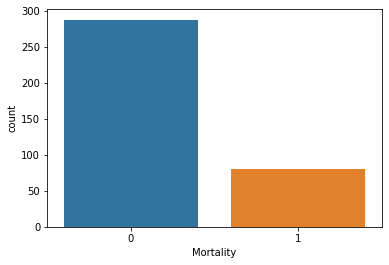

In [27]:
sns.countplot(x = y)

As you can see, the number of cases, when the patients survive is much greater than the number of deaths. To balance the data set, we can use a special function: **[imblearn.over_sampling.RandomOverSampler()](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)**:

<AxesSubplot: xlabel='Mortality', ylabel='count'>

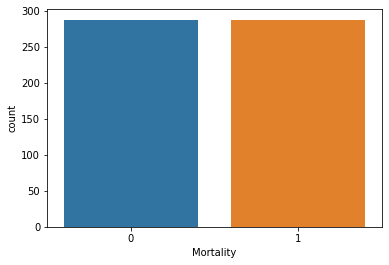

In [28]:
ROS = RandomOverSampler()
o_x, o_y = ROS.fit_resample(x,y)
sns.countplot(x = o_y)

Now, as we can see, these numbers are equal. Let's add this function to our `Pipeline`, fit the model and recalculate the accuracy.

In [29]:
pipe_s_lr = make_pipeline(trans, ROS, lr)
pipe_s_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Age Group',
                                                   'Marital Status', 'Category',
                                                   'Others', 'Diagnosis',
                                                   'SK React',
                                                   'Max heart rate-binned']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Lifestyle', 'Sleep',
                                                   'Depression',
                                                   'Hyperli...
                                                   'Allergies', 'BP',
                                                   'Thrombolysis', 'BGR', 'CPK',
                                                   'ESR', 'WBC', 'RBC',
                                                   'Hemoglobin', 'MCH', 'MCHC',
                                                   'PlateletCount',
                                                   'Lymphocyte', 'Monocyte',
                                                   'Eosinophil',
                                                   'Hypersensitivity',
                                                   'Chest pain type',
                                                   'Resting BP',
                                                   'Serum cholesterol', 'FBS',
                                                   'Resting '
                                                   'electrocardiographic',
                                                   'Max heart rate', 'Angina', ...])])),
                ('randomoversampler', RandomOverSampler()),
                ('logisticregression', LogisticRegression())])

In [30]:
pipe_s_lr.fit(x_train,y_train)
scores_train = recall_score(y_train, pipe_s_lr.predict(x_train))
scores_test = recall_score(y_test, pipe_s_lr.predict(x_test))
print('Training DataSet accuracy: {: .1%}'.format(scores_train), 'Test DataSet accuracy: {: .1%}'.format(scores_test))

Training DataSet accuracy:  100.0% Test DataSet accuracy:  100.0%


As you can see, balancing the dataset has led to a sharp increase in the accuracy of the `Recall` metric.

Let's analyze the errors of the model.

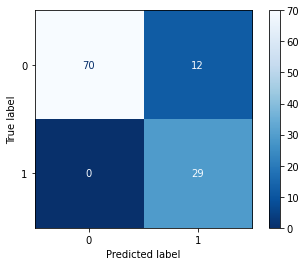

In [31]:
plot_confusion_matrix(pipe_s_lr, x_test, y_test, cmap=plt.cm.Blues_r)
plt.show() 

As can be seen, the number of erroneous predictions about the patient, who will die, has decreased significantly. However, the error is high when the model predicts mortality rate of patients, who survived. The metric `Precision` is used to assess this accuracy.

To further increase the `Recall` metric, it is necessary to change the model, because the accuracy of logistic regression on unknown data is about the same as on known data, and therefore it can no longer fit better.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Calculate cross validation score of new pipeline</b>

</div>

In [32]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
Rcross = cross_val_score(pipe_s_lr, x, y, cv=4)
print(Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
```

</details>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>Predict the output using cross validation and new pipeline</b>

</div>

In [33]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
yhat = cross_val_predict(pipe_s_lr, x, y,cv=4)
yhat[0:10]
```

</details>

### Ensemble of classifiers

Let's test other classifiers and compare the results.
We will test:
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
* [Linear SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html?highlight=linear%20svm#sklearn.svm.LinearSVR)
* [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)
* [Extra Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html)
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier)
* [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier)
* [Ada Boost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboostclassifier#sklearn.ensemble.AdaBoostClassifier)
* [Gradient Boosting for classification](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
* [Bagging classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

In addition, different classifiers may err in different situations. Therefore, to compensate for each other's mistakes, it is necessary to use model ensembles by Voting Classifier.

A **[Voting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)** is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

**Hard Voting**: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.


**Soft Voting**: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.


In [34]:
names = ["Logistic Regression", "Linear SVM",
         "Decision Tree", "Extra Tree", "Random Forest", "Neural Net",
         "AdaBoost", "GradientBoostingClassifier", "BaggingClassifier", "VotingClassifier"]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)]

est = [(str(est), est) for est in classifiers]

eclf = [VotingClassifier(
     estimators=est,
     voting='hard')]
classifiers += eclf
scores_train = []
scores_test = []
scores_train_s = []
scores_test_s = []

for name, classif in zip(names, classifiers):
    print(name,'fitting.....')
    clf = make_pipeline(trans, classif)
    clf.fit(x_train,y_train)
    score_train = recall_score(y_train, clf.predict(x_train))
    score_test = recall_score(y_test, clf.predict(x_test))    
    scores_train.append(score_train)
    scores_test.append(score_test)
    
    clf_s = make_pipeline(trans, ROS, classif)
    clf_s.fit(x_train,y_train)
    score_train_s = recall_score(y_train, clf_s.predict(x_train))
    score_test_s = recall_score(y_test, clf_s.predict(x_test))    
    scores_train_s.append(score_train_s)
    scores_test_s.append(score_test_s)

Logistic Regression fitting.....
Linear SVM fitting.....
Decision Tree fitting.....
Extra Tree fitting.....
Random Forest fitting.....
Neural Net fitting.....
AdaBoost fitting.....
GradientBoostingClassifier fitting.....
BaggingClassifier fitting.....
VotingClassifier fitting.....


Let's compare the accuracy of classifiers for balanced and unbalanced data sets.

In [35]:
res = pd.DataFrame(index = names)
res['Train'] = np.array(scores_train)
res['Test'] = np.array(scores_test)
res['Train Over Sampler'] = np.array(scores_train_s)
res['Test Over Sampler'] = np.array(scores_test_s)

res.index.name = "Classifier accuracy"
res


,Train,Test,Train Over Sampler,Test Over Sampler
Classifier accuracy,,,,
Logistic Regression,0.71,0.72,0.92,0.93
Linear SVM,0.39,0.41,0.82,0.83
Decision Tree,0.92,0.93,1.00,1.00
Extra Tree,0.47,0.45,0.90,0.93
Random Forest,0.25,0.34,0.94,0.97
Neural Net,1.00,1.00,1.00,1.00
AdaBoost,1.00,1.00,1.00,1.00
GradientBoostingClassifier,1.00,1.00,1.00,1.00
BaggingClassifier,0.00,0.00,0.82,0.72


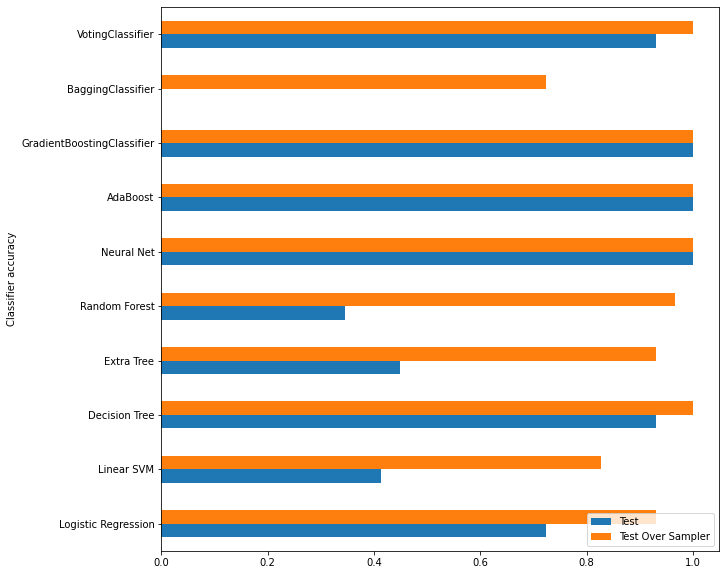

In [36]:
res[['Test', 'Test Over Sampler']].plot(kind="barh", figsize=(10,10))
plt.show()

As you can see, the balanced data set leads to a sharp increase in accuracy in all classifiers. It can also be seen that the most accurate models were GradientBoostingClassifier, AdaBoost and Neural Net. The ensemble of models showed perfect accuracy.

Let's display the last classifier:

In [37]:
clf_s

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Age Group',
                                                   'Marital Status', 'Category',
                                                   'Others', 'Diagnosis',
                                                   'SK React',
                                                   'Max heart rate-binned']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Lifestyle', 'Sleep',
                                                   'Depression',
                                                   'Hyperli...
                                              ('AdaBoostClassifier(n_estimators=100, '
                                               'random_state=0)',
                                               AdaBoostClassifier(n_estimators=100,
                                                                  random_state=0)),
                                              ('GradientBoostingClassifier(learning_rate=1.0, '
                                               'max_depth=1, random_state=0)',
                                               GradientBoostingClassifier(learning_rate=1.0,
                                                                          max_depth=1,
                                                                          random_state=0)),
                                              ('BaggingClassifier(base_estimator=SVC(), '
                                               'random_state=0)',
                                               BaggingClassifier(base_estimator=SVC(),
                                                                 random_state=0))]))])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3: </h1>

<b>Choose 3 best classifiers and make an ensemble based on them</b>

</div>

In [38]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
classifiers = [
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)]

est = [(str(est), est) for est in classifiers]

eclf = VotingClassifier(
     estimators=est,
     voting='hard')
```

</details>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Add it to `Pipeline` (use Over Sampler) and fit it</b>

</div>

In [39]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
pipe_eclf = make_pipeline(trans, eclf)
pipe_eclf.fit(x_train,y_train)
```

</details>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Calculate the accuracy of this ensemble</b>

</div>

In [40]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
score_train = recall_score(y_train, pipe_eclf.predict(x_train))
score_test = recall_score(y_test, pipe_eclf.predict(x_test)) 
print('Training DataSet accuracy: {: .1%}'.format(score_train), 'Test DataSet accuracy: {: .1%}'.format(score_test))
```

</details>

## Conclusions

In this lab we studied how to build training and test data sets and how to fit different classifiers, evaluate their accuracy and analyze errors.
We also studied how to join them together in an ensemble and create a model based on Pipeline.
We compared the accuracy of different classifiers and their ensemble and showed how they can be used in marketing on the example of customer classification.

The accuracy of the VotingClassifier was about 100%.

### Thank you for completing this lab!

## Author

<a href="https://author.skills.network/instructors/bohdan_kuno">Bohdan Kuno</a>

### Other Contributors

<a href="https://author.skills.network/instructors/yaroslav_vyklyuk_2">Prof. Yaroslav Vyklyuk, DrSc, PhD</a>

<a href="https://author.skills.network/instructors/nataliya_boyko">Ass. Prof. Nataliya Boyko, PhD</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                         |
| ----------------- | ------- | ---------- | ---------------------------------------------------------- |
|2023-03-25|01|Bohdan Kuno|Lab created|


<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
